
# Business Analysis Document

In [2]:
#import of dataset from Kaggle 
!pip install kaggle
!pip install opendatasets
import opendatasets as od
import pandas

In [4]:
od.download("https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition")

Skipping, found downloaded files in ".\fastfood-nutrition" (use force=True to force download)


In [1]:
import pandas as pd
df=pd.read_csv("fastfood.csv")

In [3]:
df.head(5)

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [4]:
#to review data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


### Task: Find out what percentage of recommended calorie intake is each item in the menu
#### Assumption: recommended average person calorie intake 2,000 calories

In [ ]:
df.insert(3,"%Recommend",df.calories/2000*100)

In [16]:
df.head()

,restaurant,item,calories,%Recommend,%Recommended,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,19.0,0.190,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,42.0,0.420,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,56.5,0.565,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,37.5,0.375,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,46.0,0.460,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


### Task: Create another column that will indicate if percentage of food item from recommended dose is not higher then 30%

In [21]:
def conditions(x):
    if (x["%Recommend"] <=30.0):
        return "Green"
    elif (x["%Recommend"] ==30.0):
        return "Yellow"
    else:
        return "Red"

In [ ]:
# Green: 30% and below & Yellow: 30% & Red: 30%+

df.insert(5,"Label",df.apply(conditions, axis=1))


In [26]:
#check for missing values to make sure Label column has no missing values
df.isna().sum()

restaurant        0
item              0
calories          0
%Recommend        0
%Recommended      0
Label             0
cal_fat           0
total_fat         0
sat_fat           0
trans_fat         0
cholesterol       0
sodium            0
total_carb        0
fiber            12
sugar             0
protein           1
vit_a           214
vit_c           210
calcium         210
salad             0
dtype: int64

<Axes: ylabel='Label'>

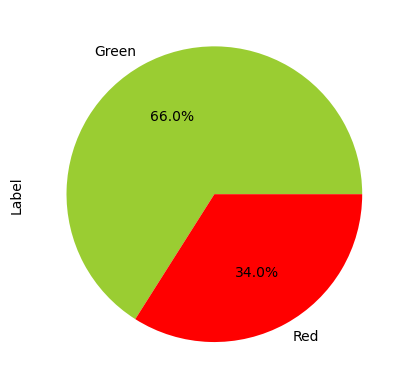

In [51]:
#pie cart using pandas to show percentages 
df["Label"].value_counts().plot.pie(legend=False,autopct='%1.1f%%',colors=["yellowgreen", "red"])

In [ ]:
#Conclusion : 34% of items listed in the menu needs to be reviewed 

In [53]:
df.head()

,restaurant,item,calories,%Recommend,%Recommended,Label,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,19.0,0.190,Green,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,42.0,0.420,Red,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,56.5,0.565,Red,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,37.5,0.375,Red,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,46.0,0.460,Red,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


#### How many Red label items in each restaurant?


In [54]:
#verify restaurants in restaurnat column - how many unique ones there are
print(df['restaurant'].unique())

['Mcdonalds' 'Chick Fil-A' 'Sonic' 'Arbys' 'Burger King' 'Dairy Queen'
 'Subway' 'Taco Bell']


In [55]:
import matplotlib.pyplot as plt

In [58]:
df_red=df.loc[df['Label'] == "Red"]

In [59]:
df_red.head()

,restaurant,item,calories,%Recommend,%Recommended,Label,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
1,Mcdonalds,Single Bacon Smokehouse Burger,840,42.0,0.420,Red,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,56.5,0.565,Red,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,37.5,0.375,Red,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,46.0,0.460,Red,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
9,Mcdonalds,Double Quarter Pounder® with Cheese,770,38.5,0.385,Red,400,45,21.0,2.5,175,1290,42,3.0,10,51.0,20.0,6.0,20.0,Other


<Axes: >

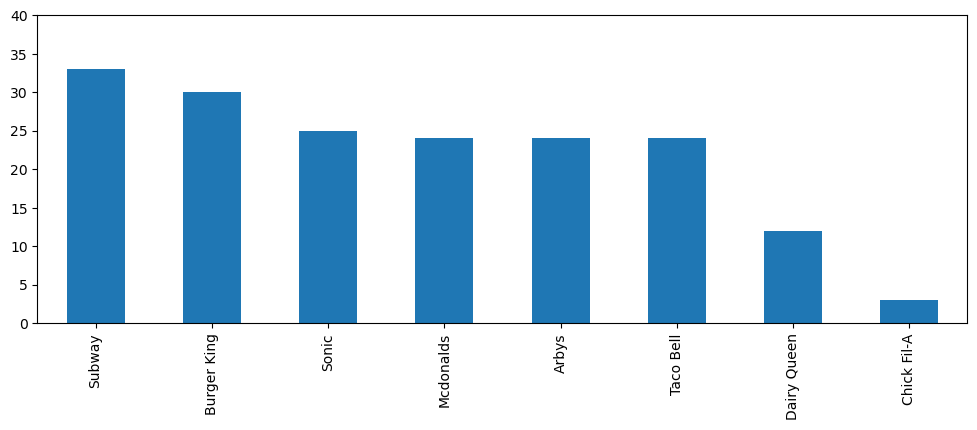

In [97]:
df_red.restaurant.value_counts().plot(kind="bar",figsize=(12,4),ylim=(0,40))


In [98]:
#above you can see how many items in menu are labelled red and need review per restaurant